In [17]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import statistics
data= pd.read_csv('raw_sales2.csv')
print(data.head())

              datesold  postcode   price propertyType  bedrooms
0  2007-02-07 00:00:00      2607  525000        house         4
1  2007-02-27 00:00:00      2906  290000        house         3
2  2007-03-07 00:00:00      2905  328000        house         3
3  2007-03-09 00:00:00      2905  380000        house         4
4  2007-03-21 00:00:00      2906  310000        house         3


In [18]:
data.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


range of outlier is -3 to +3 like in normal distribution

In [19]:
def finding_outliers(data):
    outliers = []
    random_data_std= np.std(data)
    random_data_mean = np.mean(data)
    outliers_cutoff = random_data_std * 3
    lower_limit = random_data_mean - outliers_cutoff
    upper_limit = random_data_mean + outliers_cutoff
    for value in data:
        if value > upper_limit or value < lower_limit:
            outliers.append(value)
    return outliers

    
print(finding_outliers(data['price']))


[1530000, 1780000, 1460000, 3500000, 2100000, 1580000, 2600000, 1875000, 2200000, 1620000, 1562500, 2350000, 1580000, 7300000, 1670000, 1780000, 2400000, 1530000, 1567140, 1700000, 1675000, 2060000, 1750000, 1500000, 1725000, 1455000, 2000000, 1475000, 4150000, 1780000, 1650000, 2500000, 5425000, 2200000, 2375000, 2100000, 1950000, 1980000, 1525000, 1900000, 1460000, 1500000, 1500000, 2760000, 1550000, 1605000, 1730000, 1650000, 1575000, 1530000, 1510000, 1501000, 1880000, 1620000, 1650000, 1470000, 1495000, 1600000, 1910000, 1485000, 1965000, 1640000, 1777500, 1500000, 1480000, 1650000, 1625000, 1540000, 2600000, 1900000, 3160000, 1975000, 1555000, 1900000, 1785000, 1701000, 1510000, 2080000, 3400000, 2050000, 1510000, 2550000, 1900000, 1801000, 1950000, 3400000, 1650000, 1915000, 1870000, 1560000, 2400000, 2090000, 1490000, 1670000, 1550000, 1560000, 1700000, 1800000, 1900000, 1710000, 1475000, 2125000, 1600000, 1675000, 1952500, 1670000, 1665000, 2150000, 1460000, 1715000, 1750000, 

In [20]:
len(finding_outliers(data['price']))

461

In [21]:
data.price.skew()

np.float64(4.312009366902366)

<Axes: xlabel='price', ylabel='Density'>

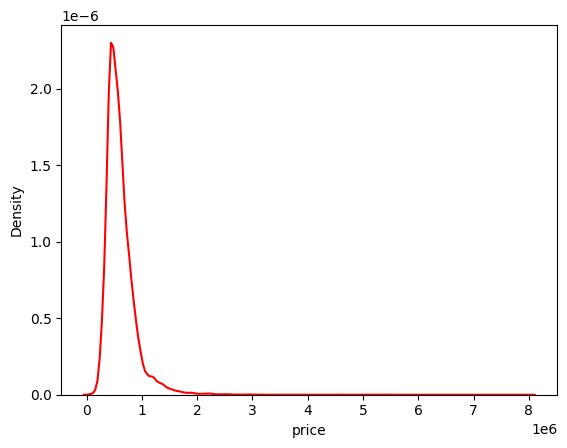

In [22]:
import seaborn as sns
sns.kdeplot(data['price'], color='red', label='Price Distribution')

In [23]:
data['price_transformed'] = np.log(data['price'])
data['price_transformed'].skew()

np.float64(0.4731646269984763)

<Axes: xlabel='price_transformed', ylabel='Density'>

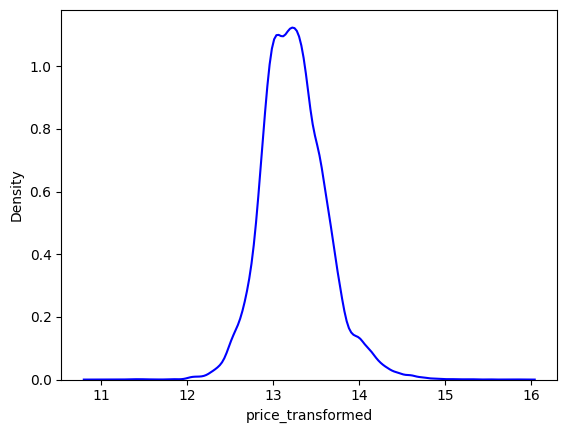

In [24]:
sns.kdeplot(data['price_transformed'], color='blue', label='Transformed Price Distribution')


<Axes: xlabel='price_transformed_double', ylabel='Density'>

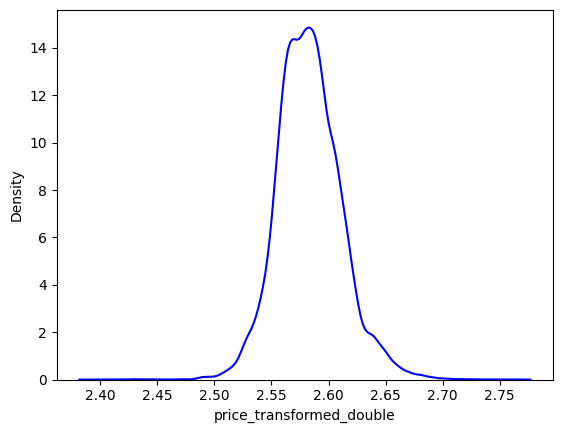

In [26]:
data['price_transformed_double'] = np.log(data['price_transformed'])
sns.kdeplot(data['price_transformed_double'], color='blue', label='Transformed Price Distribution')

In [27]:
data['price_transformed_double'].skew()

np.float64(0.33092530655758573)

<Axes: ylabel='price_transformed_double'>

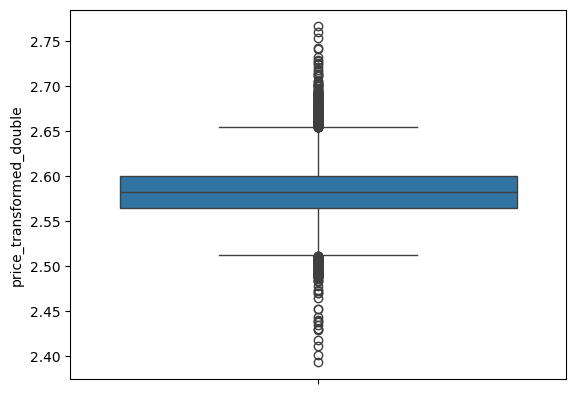

In [28]:
sns.boxplot(data['price_transformed_double'])

In [30]:
df=pd.DataFrame(data)
df.describe()

,postcode,price,bedrooms,price_transformed,price_transformed_double
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002
